In [20]:
#importing relevant libraries and loading data for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

#import pymc as pc
#import arviz as az

In [4]:
pip install pymc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^

In [8]:
dfo = pd.read_csv("orders.csv")
dfi = pd.read_csv("instructions.csv")
dfd = pd.read_csv("doctors.csv")
dfc = pd.read_csv("complaints.csv")

### 1. Why is region a bad predictor?

First, let's uncover why exactly geography is a bad predictor of purchase

In [10]:
dfo.sample(4)

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
107,AFCADC,DFFJGDJ,AHIJJDC,False,False,False,True,False,True,False,False,Before
88,FCIJH,DGJDBCE,AIJGJDE,False,False,False,False,False,False,True,False,Before
155,FAICB,DGIEGIA,AIDCGDJ,True,True,False,False,False,False,True,False,Before
141,FAGIE,DFGAGCC,AHIDDFI,False,False,True,False,False,True,False,True,Before


In [11]:
dfi.sample(4)

,DoctorID,Instructions
13,IDIAG,Yes
24,ADBEEF,No
44,AHDCBA,Yes
15,GGCCG,Yes


In [12]:
dfc.sample(4)

,DoctorID,Complaint Type,Qty
337,AIBAHD,Correct,1
400,BBHCBF,Unknown,1
249,ABFFCJ,Incorrect,1
97,FCJGE,Unknown,1


In [13]:
dfd.sample(4)

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
415,FBIHF,1 8 T3,Specialist,Platinum,2.33,1.40,-33.33,0.30,10.0
48,FDDIH,1 14 T3,Specialist,Titanium,8.00,1.11,31.58,0.67,18.0
278,FCDEJ,1 12,Specialist,Platinum,3.00,0.00,--,0.67,3.0
324,ABEAFF,1 8 T4,Specialist,Ambassador,3.00,0.63,23.08,0.00,8.0


In [19]:
dfd.Region.nunique()

46

In [23]:
# Summary statistics for each category
print(dfd.groupby("Region")["Purchases"].describe())


         count        mean        std    min     25%    50%     75%    max
Region                                                                    
1 10      15.0   15.000000  12.800670    4.0    4.50   11.0   18.00   45.0
1 10 T3    8.0   11.375000   7.633339    5.0    6.75   10.0   11.50   29.0
1 11      23.0   10.565217   7.076376    3.0    5.00   10.0   14.00   30.0
1 12      23.0   14.913043  10.334906    3.0    6.50   13.0   20.50   37.0
1 12 T3    6.0   14.833333   8.352644    7.0    8.25   12.5   20.50   27.0
1 12 T4    2.0   22.500000  10.606602   15.0   18.75   22.5   26.25   30.0
1 13      34.0   10.382353  11.767996    3.0    4.00    7.0   11.50   64.0
1 13 T3   11.0    9.909091   7.231245    3.0    7.00    8.0   10.00   30.0
1 13 T4    1.0   30.000000        NaN   30.0   30.00   30.0   30.00   30.0
1 14      32.0   12.156250  12.826659    3.0    5.00    7.5   13.25   52.0
1 14 T3   15.0   11.666667   7.943251    3.0    7.50    9.0   14.00   29.0
1 14 T4    4.0   19.50000

In [28]:
dfd.Region.unique()

array(['4 15', '1 8 T4', '1 9 T4', '1 10 T3', '1 14 T4', '1 10', '1 8 T3',
       '1 11', '1 12', '2 7 19', '1 19 T4', '2 11', '1 19 T3', '1 14',
       '1 12 T3', '1 13 T3', '1 19', '1 21 T3', '2 7 13', '1 14 T3',
       '1 12 T4', '1 13', '2 6 13', '2 7 9', '1 8', '1 9', '2 6 9',
       '2 7 12', '17', '1 9 T3', '2 6 8', '1 4CP', '5 18', '22 18',
       '2 7 8', '2 6 10', '2 7 14', '1 21 T4', '2 7 10', '2 6 12',
       '2 6 19', '3 16', '2 6 14', '23 3', '1 13 T4', '1 19 20'],
      dtype=object)

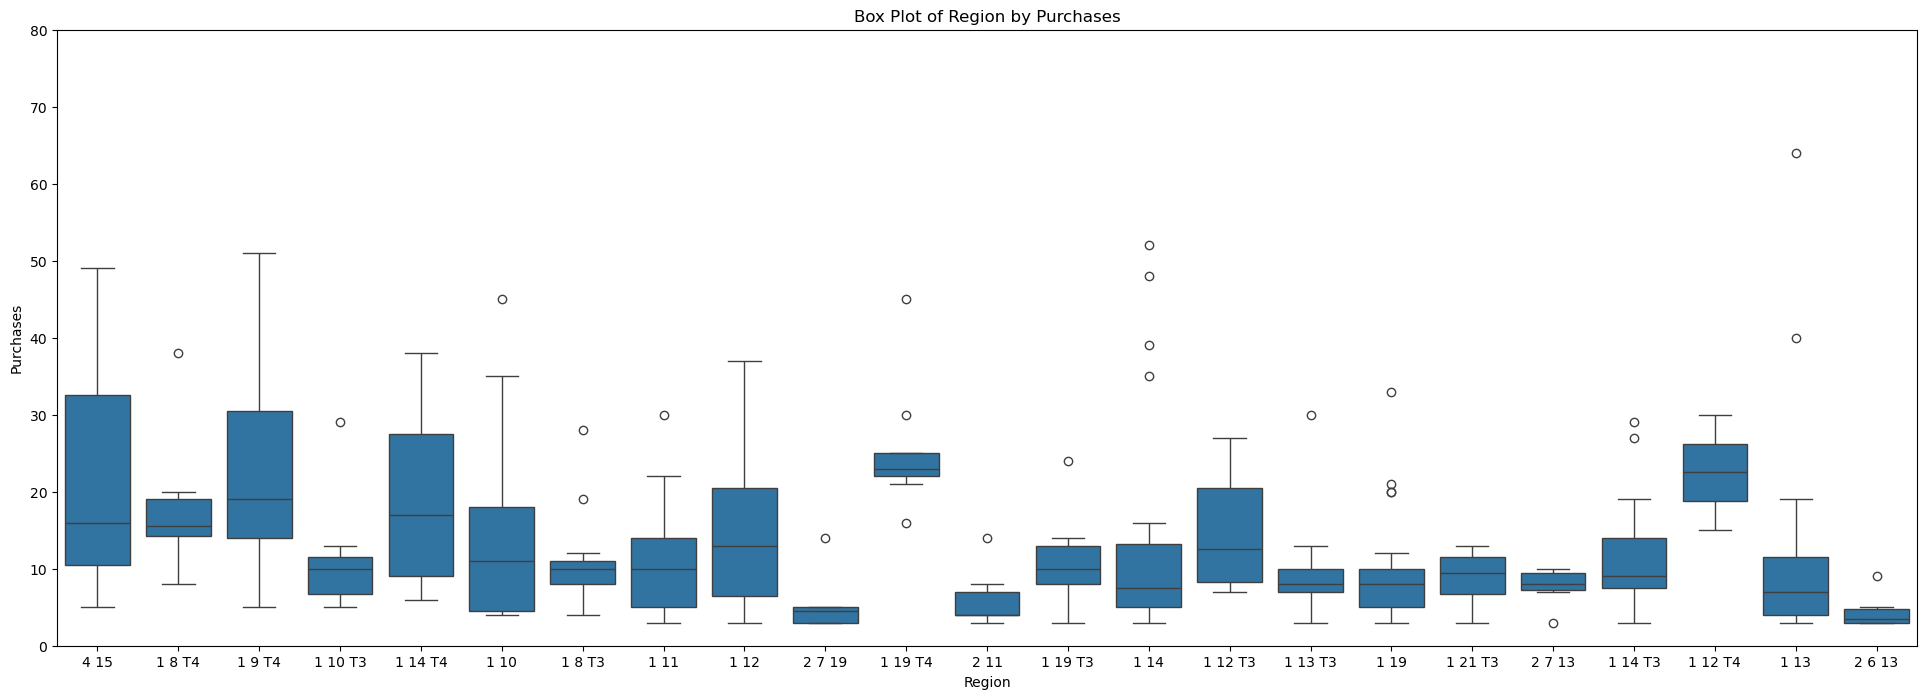

In [56]:
plt.figure(figsize=(24, 8))
arr1 = ['4 15', '1 8 T4', '1 9 T4', '1 10 T3', '1 14 T4', '1 10', '1 8 T3',
       '1 11', '1 12', '2 7 19', '1 19 T4', '2 11', '1 19 T3', '1 14',
       '1 12 T3', '1 13 T3', '1 19', '1 21 T3', '2 7 13', '1 14 T3',
       '1 12 T4', '1 13', '2 6 13']
arr2 = ['2 7 9', '1 8', '1 9', '2 6 9',
       '2 7 12', '17', '1 9 T3', '2 6 8', '1 4CP', '5 18', '22 18',
       '2 7 8', '2 6 10', '2 7 14', '1 21 T4', '2 7 10', '2 6 12',
       '2 6 19', '3 16', '2 6 14', '23 3', '1 13 T4']

#this code is remodified to exclude 1 19 20 region because it is an uncommon single occuring purchase, therfore acting as an outlier
sns.boxplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr1)])
plt.title("Box Plot of Region by Purchases")
plt.ylim(0,80)
plt.show()


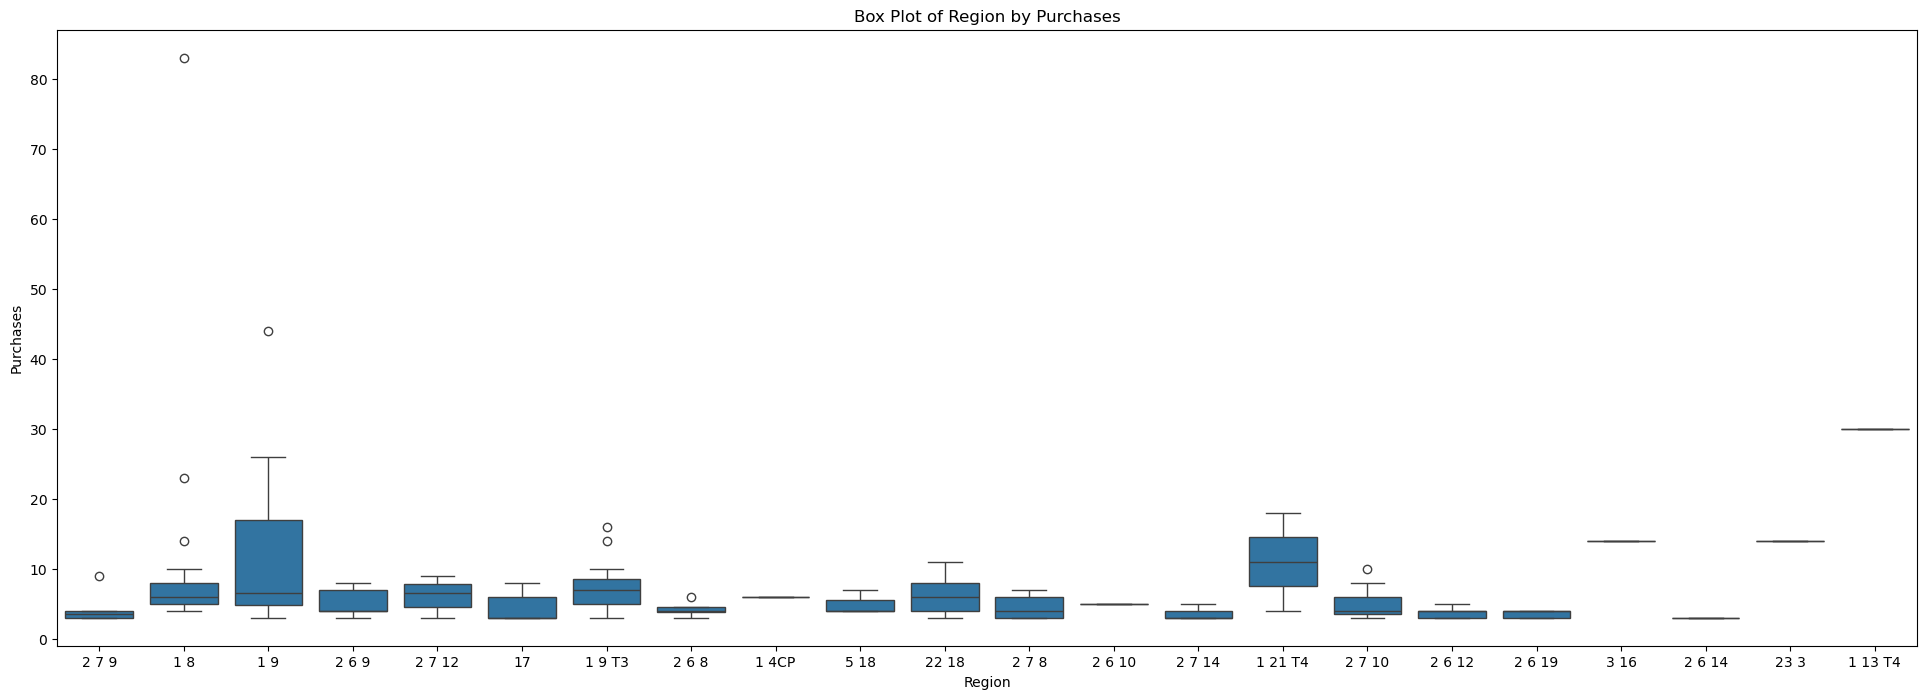

In [55]:
plt.figure(figsize=(24, 8))
sns.boxplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr2)])
plt.title("Box Plot of Region by Purchases")

plt.show()

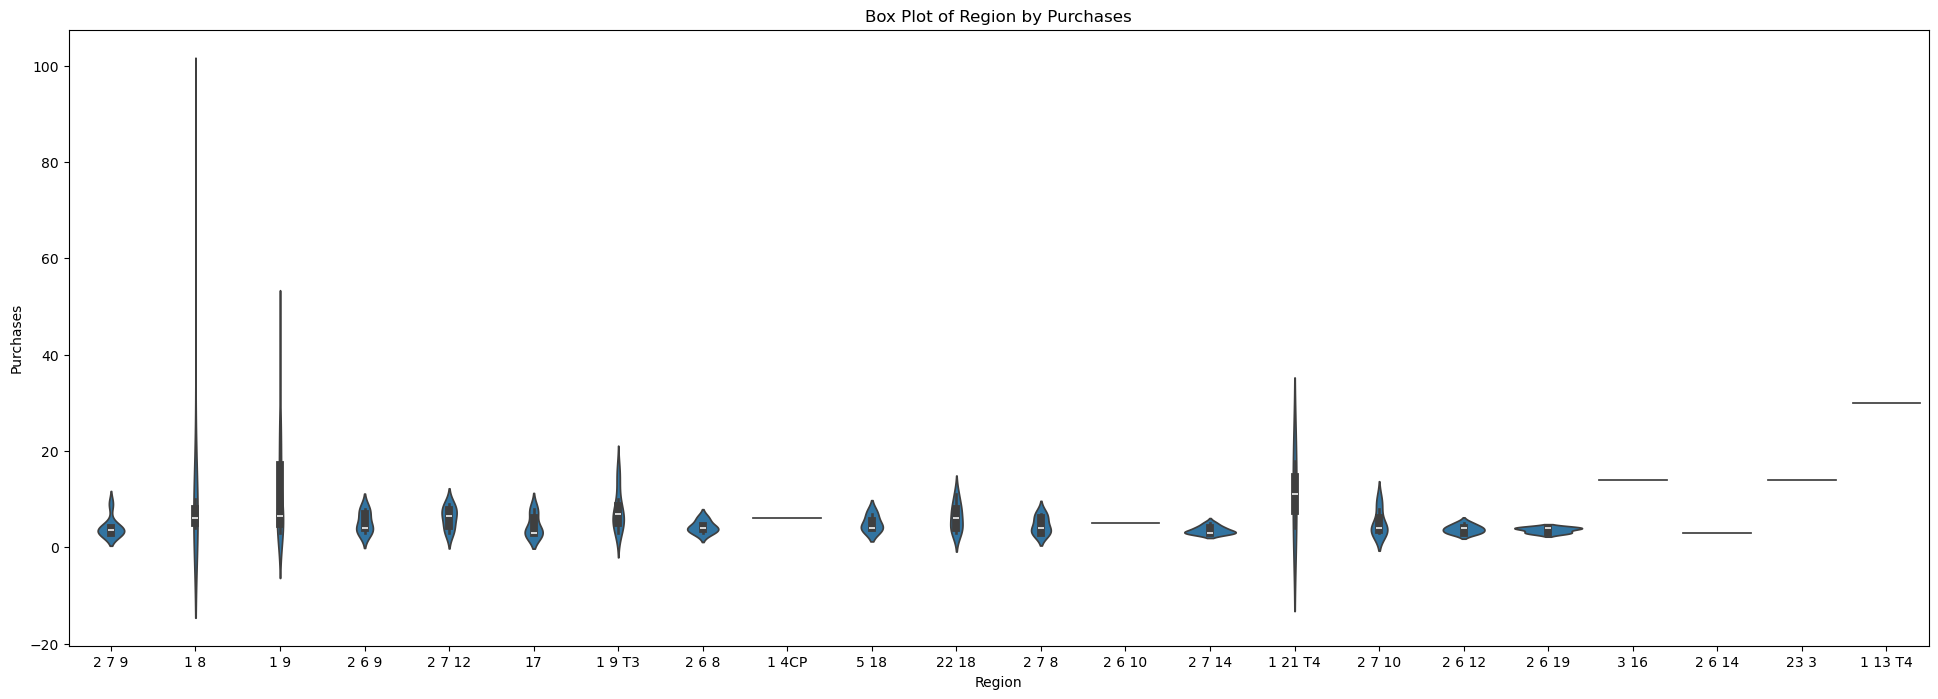

In [57]:
plt.figure(figsize=(24, 8))
sns.violinplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr2)])
plt.title("Box Plot of Region by Purchases")
plt.show()


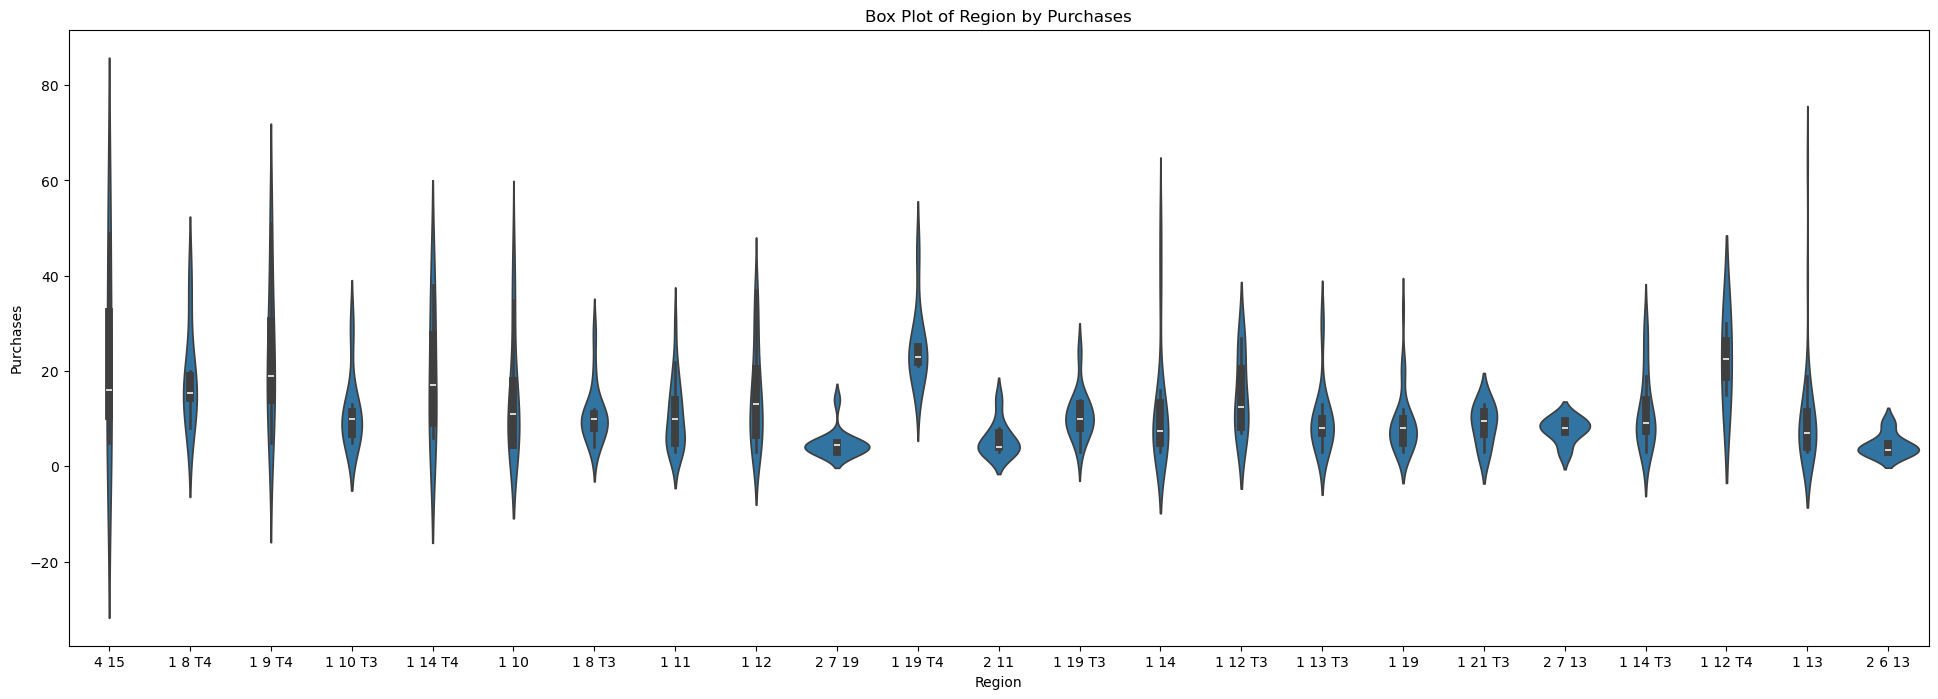

In [58]:
plt.figure(figsize=(24, 8))
sns.violinplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr1)])
plt.title("Box Plot of Region by Purchases")
plt.show()

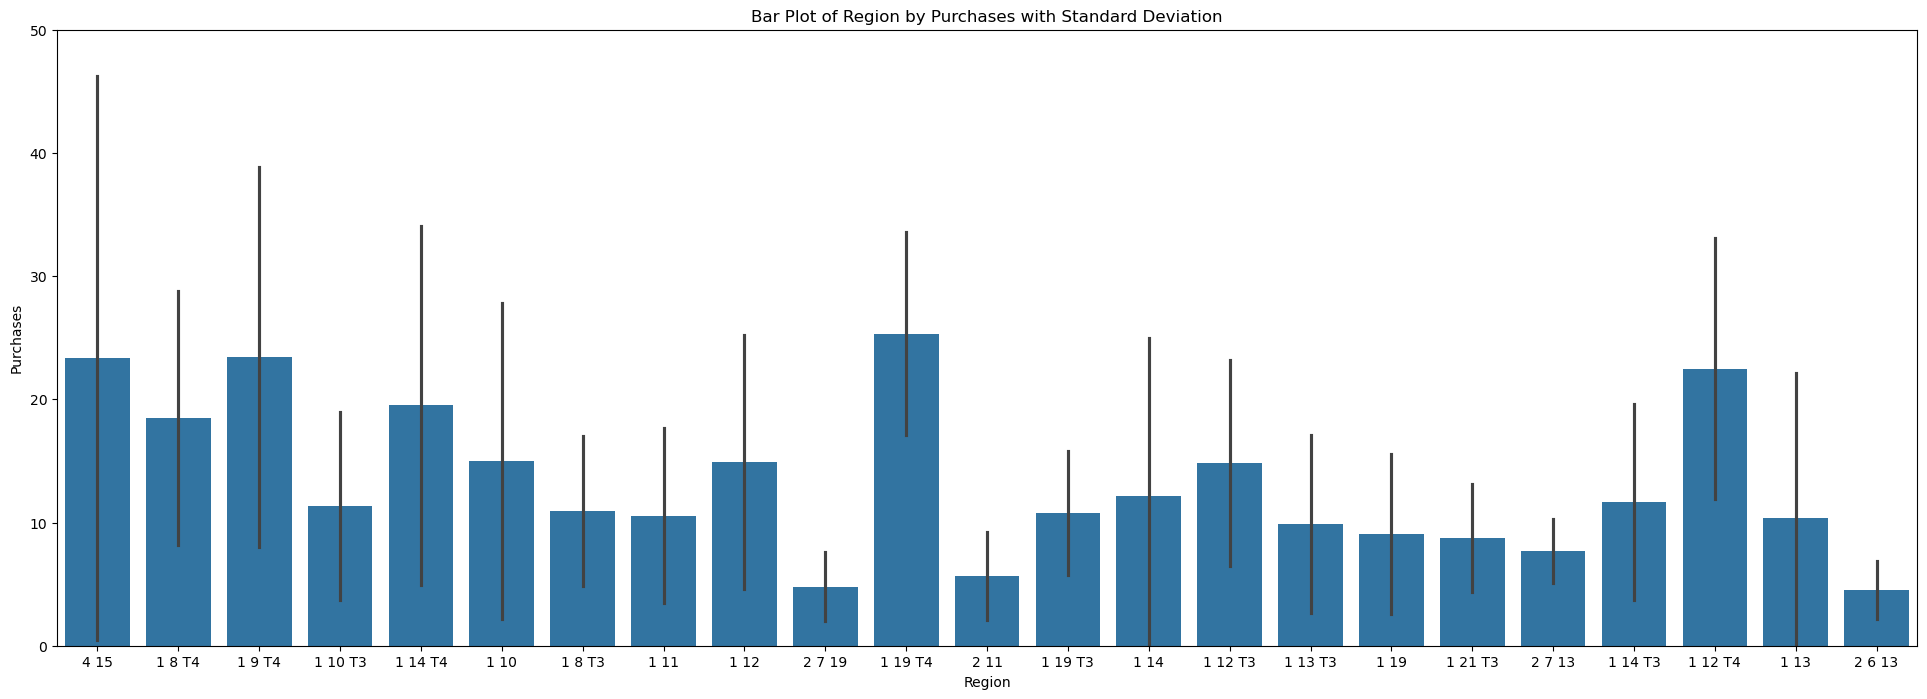

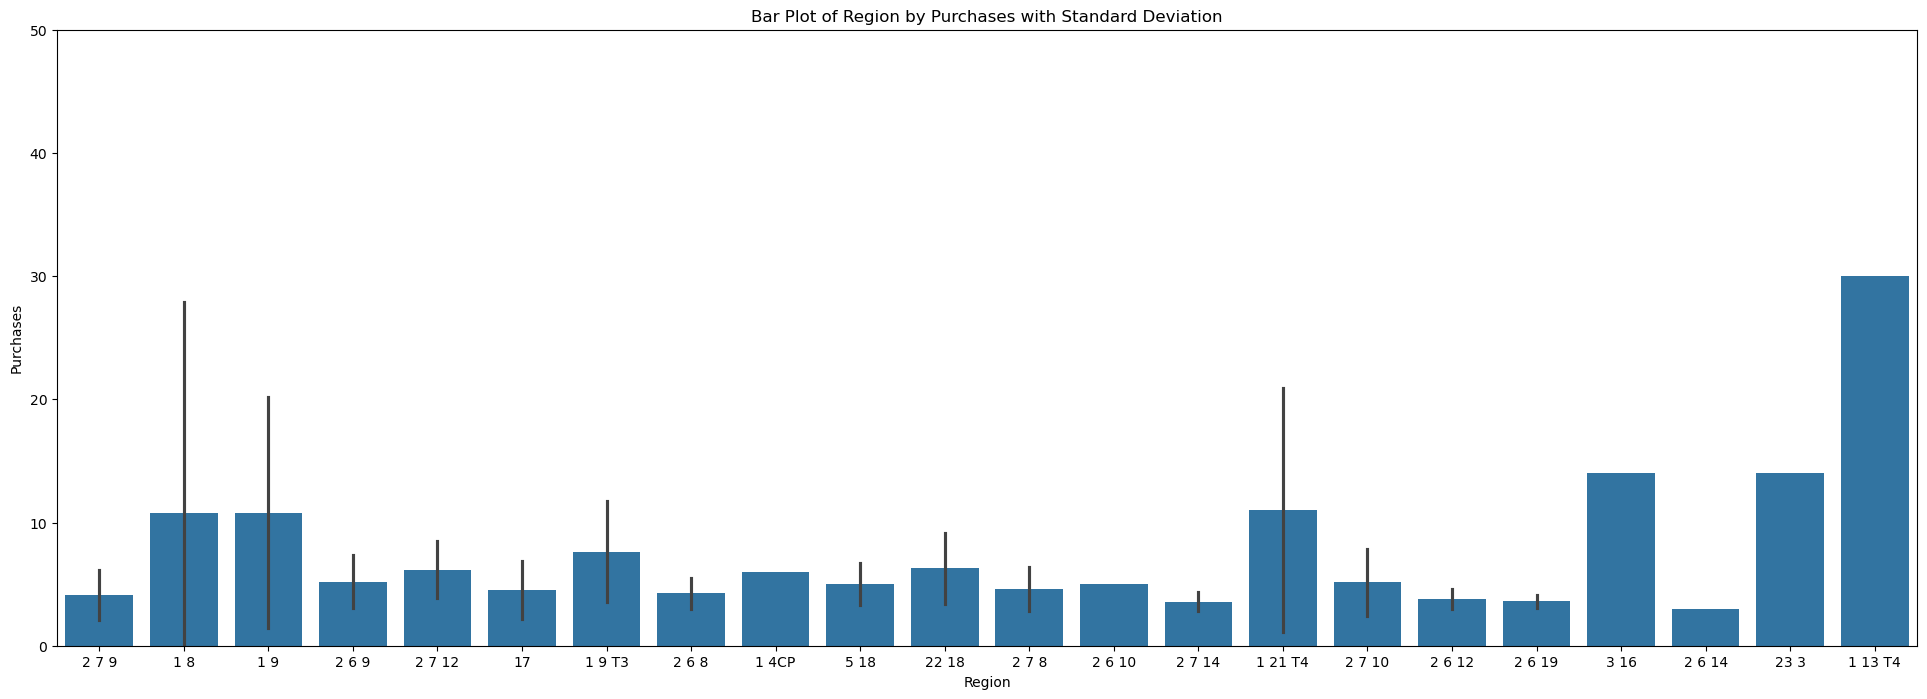

In [61]:
plt.figure(figsize=(24, 8))
sns.barplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr1)], errorbar='sd')
plt.title("Bar Plot of Region by Purchases with Standard Deviation")
plt.ylim(0,50)
plt.show()

plt.figure(figsize=(24, 8))
sns.barplot(x="Region", y="Purchases", data=dfd[dfd["Region"].isin(arr2)], errorbar='sd')
plt.title("Bar Plot of Region by Purchases with Standard Deviation")
plt.ylim(0,50)
plt.show()

<Figure size 2400x800 with 0 Axes>

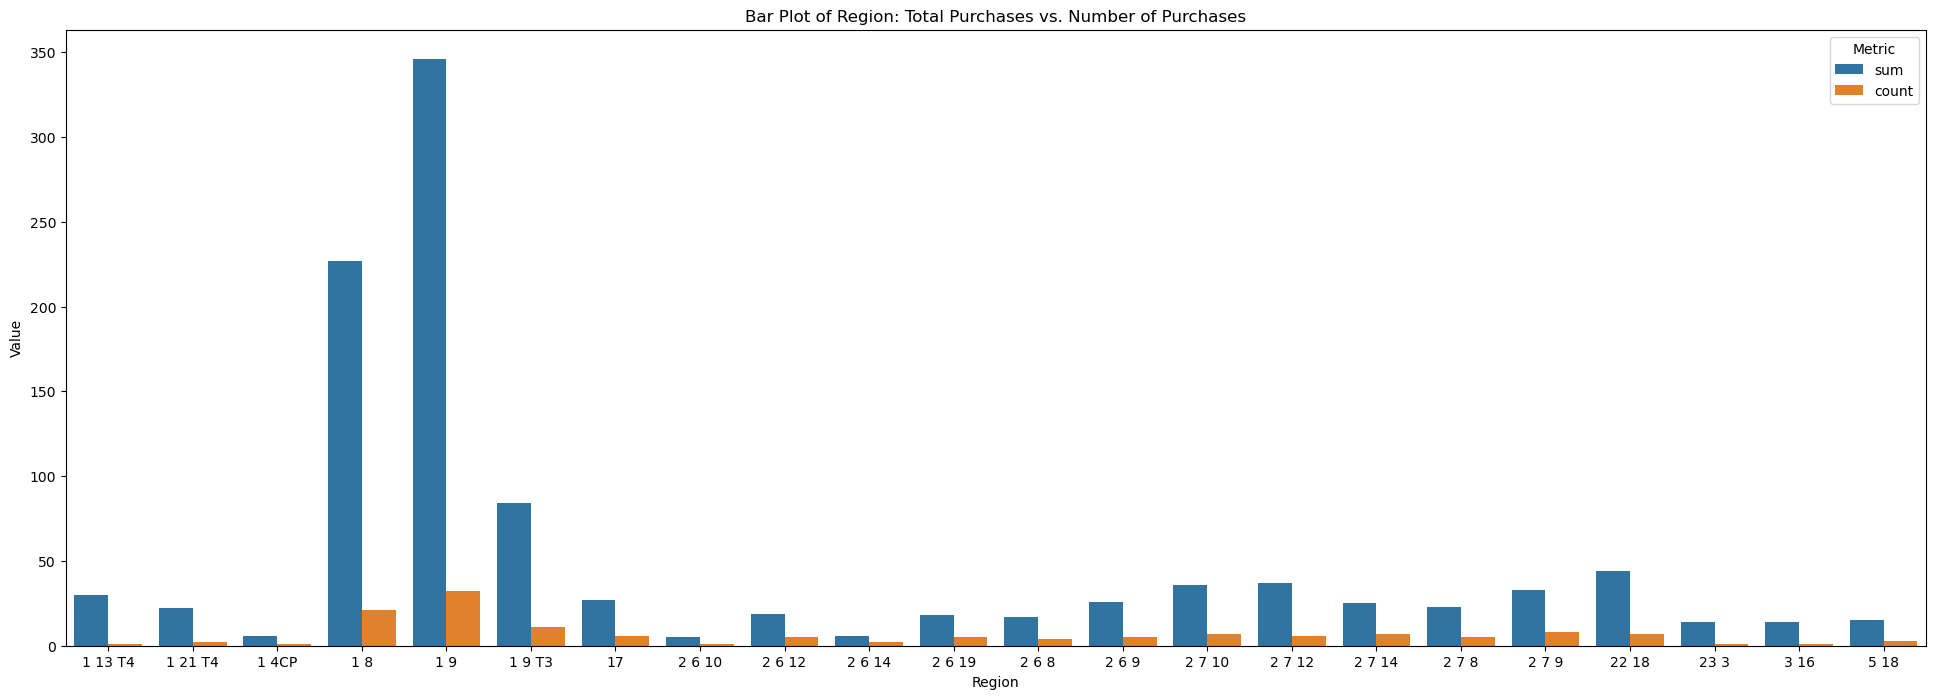

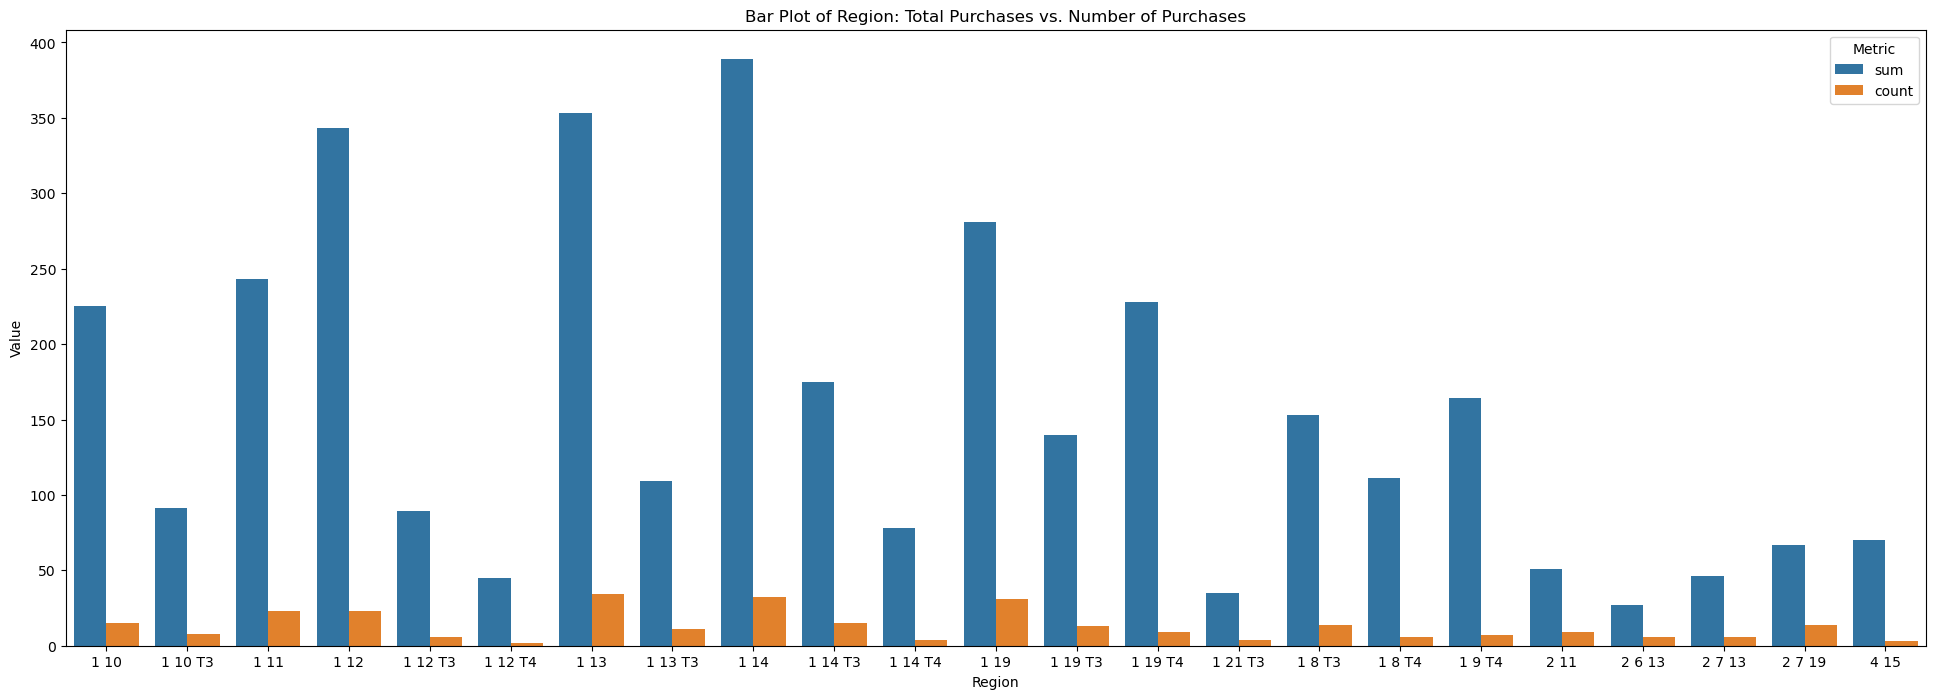

In [63]:
plt.figure(figsize=(24, 8))
# Compute sum of purchases and count of purchases per region
df_summary = dfd[dfd["Region"].isin(arr2)].groupby("Region")["Purchases"].agg(["sum", "count"]).reset_index()

# Melt the DataFrame to long format for grouped bar plot
df_long = df_summary.melt(id_vars="Region", var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(24, 8))
sns.barplot(x="Region", y="Value", hue="Metric", data=df_long, errorbar="sd")

plt.title("Bar Plot of Region: Total Purchases vs. Number of Purchases")
plt.xlabel("Region")
plt.ylabel("Value")
plt.legend(title="Metric")
plt.show()


# Compute sum of purchases and count of purchases per region
df_summary = dfd[dfd["Region"].isin(arr1)].groupby("Region")["Purchases"].agg(["sum", "count"]).reset_index()

# Melt the DataFrame to long format for grouped bar plot
df_long = df_summary.melt(id_vars="Region", var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(24, 8))
sns.barplot(x="Region", y="Value", hue="Metric", data=df_long, errorbar="sd")

plt.title("Bar Plot of Region: Total Purchases vs. Number of Purchases")
plt.xlabel("Region")
plt.ylabel("Value")
plt.legend(title="Metric")
plt.show()

In [47]:
dfd.DoctorID.nunique()

437

In [66]:
model = ols("Purchases ~ C(Region)", data=dfd[dfd['Region']!='1 19 20']).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("ANOVA Test Result:\n", anova_result)


ANOVA Test Result:
                  sum_sq     df         F        PR(>F)
C(Region)   9637.091497   44.0  2.570519  7.804807e-07
Residual   33315.722723  391.0       NaN           NaN


In [67]:
ss_between = anova_result["sum_sq"][0]
ss_total = ss_between + anova_result["sum_sq"][1]
eta_squared = ss_between / ss_total
print(f"Eta-Squared: {eta_squared:.4f}")


Eta-Squared: 0.2244


C:\Users\Owan\AppData\Local\Temp\ipykernel_15364\585540260.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_result["sum_sq"][0]
C:\Users\Owan\AppData\Local\Temp\ipykernel_15364\585540260.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_total = ss_between + anova_result["sum_sq"][1]
